## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
train = pd.read_csv("C:/Users/wwaswa/Desktop/Financial_Inclusion/Train.csv")
test = pd.read_csv("C:/Users/wwaswa/Desktop/Financial_Inclusion/Test.csv")
variables = pd.read_csv("C:/Users/wwaswa/Desktop/Financial_Inclusion/VariableDefinitions.csv")
samples = pd.read_csv("C:/Users/wwaswa/Desktop/Financial_Inclusion/SampleSubmission.csv")

In [3]:
## Viewing the data

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [6]:
variables.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


In [7]:
samples.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [8]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [9]:
test.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

 We observe from the above that the target variable being predicted is the bank_account from the train dataset

In [10]:
train.shape

(23524, 13)

In [11]:
##checking for missing data in train

In [12]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

 There are no missing data in our trainnig dataset

In [13]:
test.shape

(10086, 12)

In [14]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Similarly theres no missing value in test our dataset

## Performing EDA on the datasets

Text(0.5, 1.0, 'Relationship_between_country_and_household size')

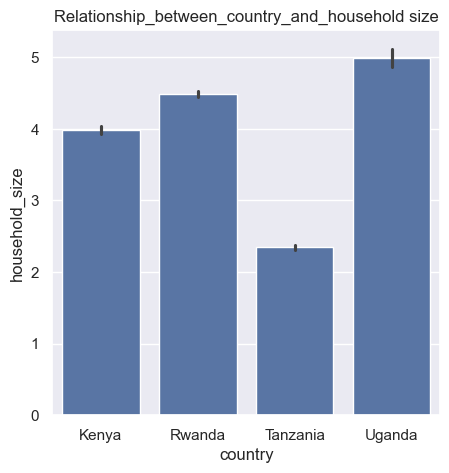

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'country',y = 'household_size',data = train)
plt.title('Relationship_between_country_and_household size')

Uganda tops the lsit with the highest household while Tanzania is the least

Text(0.5, 1.0, 'Level of Education')

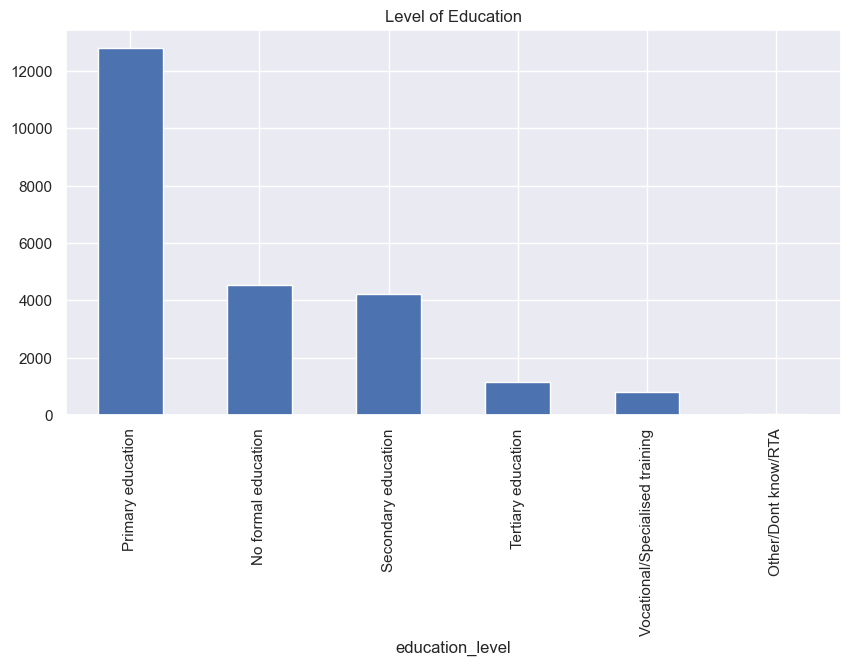

In [16]:
Education = train['education_level'].value_counts()[:10]
Education.plot(kind = 'bar',figsize=(10,5))
plt.title('Level of Education')

Text(0.5, 1.0, 'Interaction_between_age_of_respondent_and_household_size')

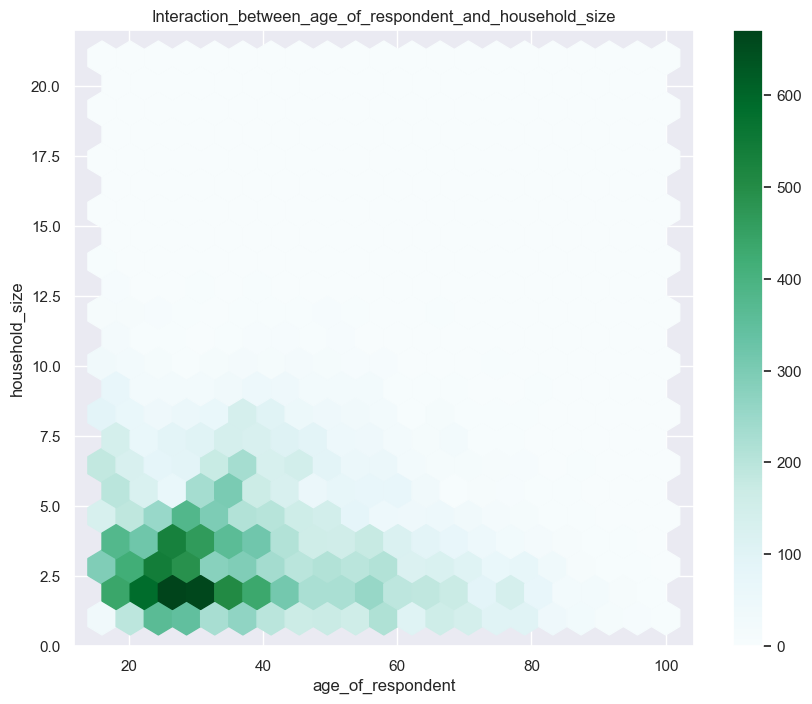

In [17]:
train.plot.hexbin(x='age_of_respondent', y='household_size', gridsize=20, figsize=(10,8))
plt.title('Interaction_between_age_of_respondent_and_household_size')

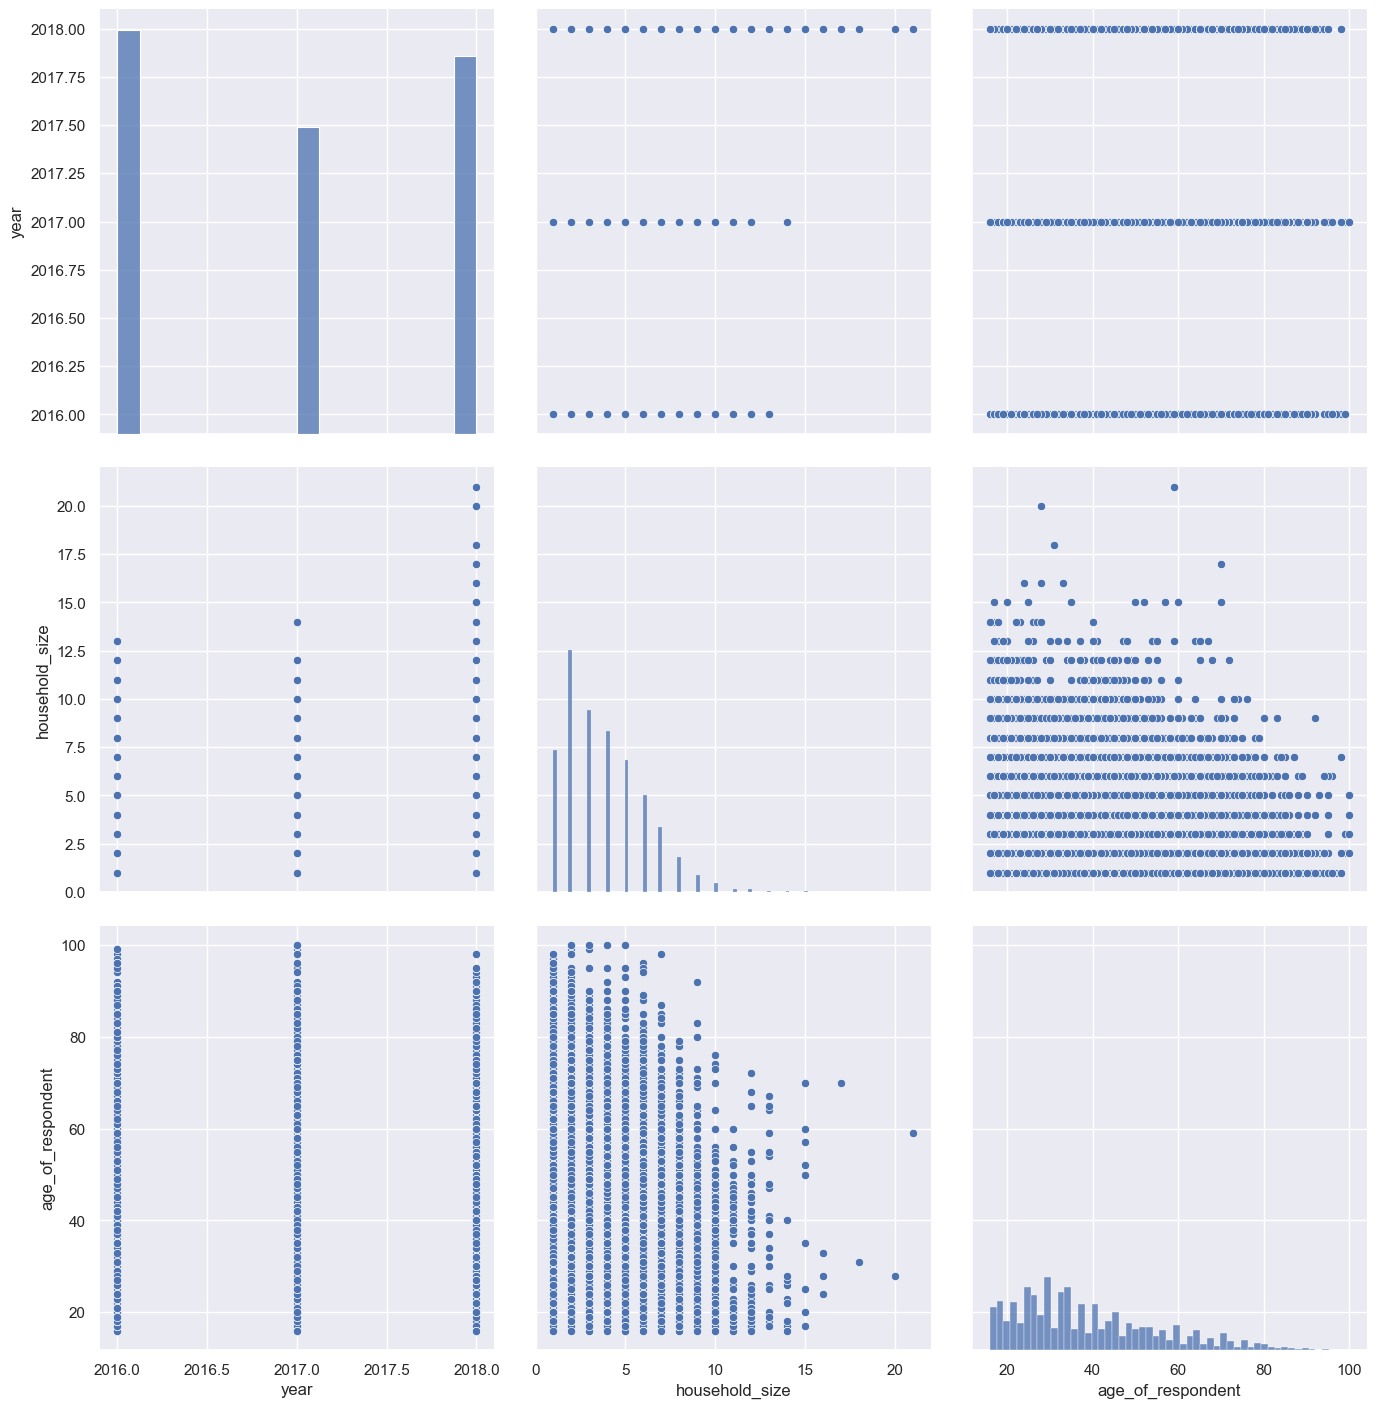

In [18]:
g = sns.pairplot(train)
g.fig.set_size_inches(15,15)

In [19]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


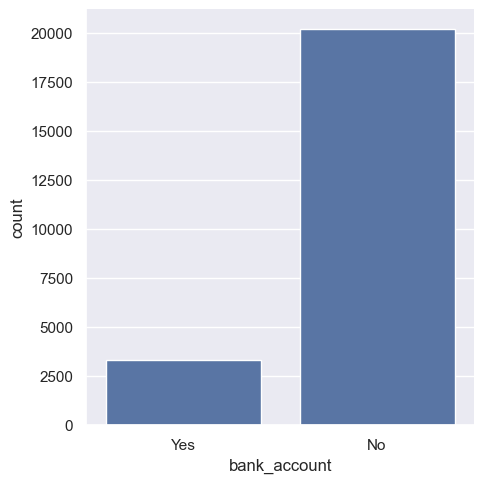

In [20]:
sns.catplot(x="bank_account", kind="count", data=train)

<Axes: ylabel='count'>

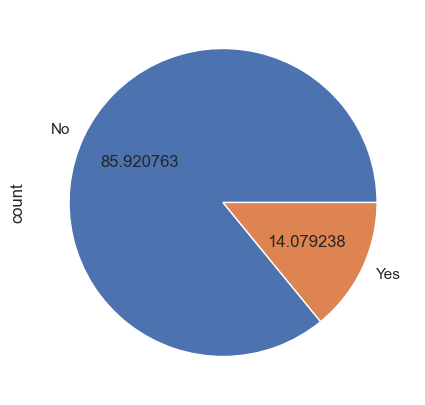

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
train['bank_account'].value_counts().plot.pie(autopct = '%2f')

In [22]:
##Eliminating unrelated variables to our target columns

In [23]:
train.drop(["uniqueid"], axis = 1, inplace = True)

In [24]:
test1 = test.drop(['uniqueid'], axis=1)

## Encoding categorical and Numerical variables

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [26]:
le = LabelEncoder()
train["bank_account"] = le.fit_transform(train["bank_account"])
##converting integer variables to float
def preprocessing_data(data):
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    ## use OneHotEncoding for categorical variables
    category = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=category)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    return data
    

In [27]:
##confirmation of encoding

In [28]:
train = preprocessing_data(train)
test1 = preprocessing_data(test1)

In [29]:
train.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,1,0,1,3,24,0,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2018,0,0,0,5,70,0,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,2018,1,1,1,5,26,1,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,2018,0,0,1,5,34,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,2018,0,1,0,8,26,1,True,False,False,...,False,True,False,False,False,False,True,False,False,False


In [30]:
train.shape

(23524, 38)

In [31]:
test1.shape

(10086, 37)

In [32]:
#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

In [33]:
y_train.value_counts()

bank_account
0    20212
1     3312
Name: count, dtype: int64

<Axes: ylabel='count'>

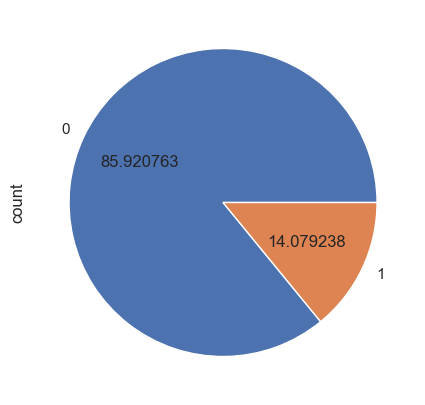

In [34]:
y_train.value_counts().plot.pie(autopct = '%2f')

In [35]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [36]:
# handling the inbalanced data

from collections import Counter 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#fit predictor and target variable

X_smote, y_smote = smote.fit_resample(X_train,y_train)

print('original dataset shape', Counter(y_train))
print('resample dataset shape', Counter(y_smote))

original dataset shape Counter({0: 20212, 1: 3312})
resample dataset shape Counter({1: 20212, 0: 20212})


<Axes: ylabel='count'>

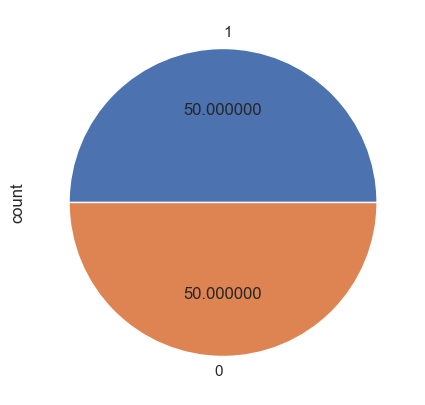

In [37]:
y_smote.value_counts().plot.pie(autopct = '%2f')

In [38]:
## we now have a balanced dataset

## Model Selection 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_smote, y_smote)

RandomForestClassifier()

In [42]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [44]:
##evaluate the model
rfc_pred = rfc.predict(X_smote)


In [47]:
##Get error rate
print("Error rate of RandomForestClassifier classifier: ", mean_absolute_error(y_smote, rfc_pred))
print(classification_report(y_smote, rfc_pred))

Error rate of RandomForestClassifier classifier:  0.023401939441915695
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20212
           1       0.98      0.98      0.98     20212

    accuracy                           0.98     40424
   macro avg       0.98      0.98      0.98     40424
weighted avg       0.98      0.98      0.98     40424



In [62]:
test.bank_account = rfc.predict(test1)
##Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

submission.to_csv('11_submission.csv', index = False)


In [60]:
print(test.bank_account)

[1 1 0 ... 0 0 0]


In [61]:
 ##Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

submission.to_csv('11_submission.csv', index = False)

In [63]:
print(submission.head())

                uniqueid  bank_account
0  uniqueid_6056 x Kenya             1
1  uniqueid_6060 x Kenya             1
2  uniqueid_6065 x Kenya             0
3  uniqueid_6072 x Kenya             0
4  uniqueid_6073 x Kenya             0


In [64]:
import os

In [65]:
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: C:\Users\wwaswa


In [66]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(rfc,X_smote, y_smote,normalize='true')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\wwaswa\Anaconda\Software\envs\anaconda\Lib\site-packages\sklearn\metrics\__init__.py)